<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/MLA2_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.rename(columns={'Usage_kWh':'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor':'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor':'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM':'nsm'}, inplace=True)
df.rename(columns={'WeekStatus':'week_status'}, inplace=True)
df.rename(columns={'Day_of_week':'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type':'load_type'}, inplace=True)

In [ ]:
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

### Statistical and Visual Exploration

Numerical columns: usage_kwh, lag_react_pwr_kvarh, lead_react_pwr_kvarh, CO2(tCO2), lag_current_pwr, lead_current_pwr, and nsm

In [ ]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


<Axes: ylabel='load_type'>

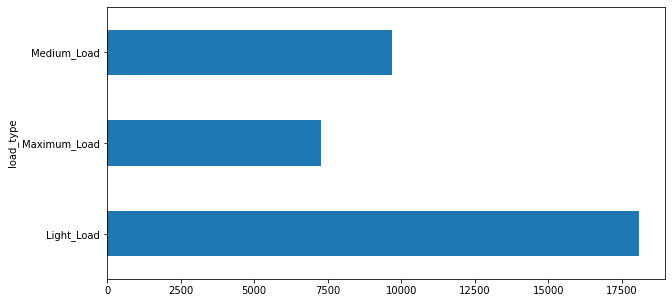

In [ ]:
load_type = df.load_type.groupby(df.load_type).count()
s = pd.Series(load_type)
s.plot(kind='barh', figsize=(10,5))

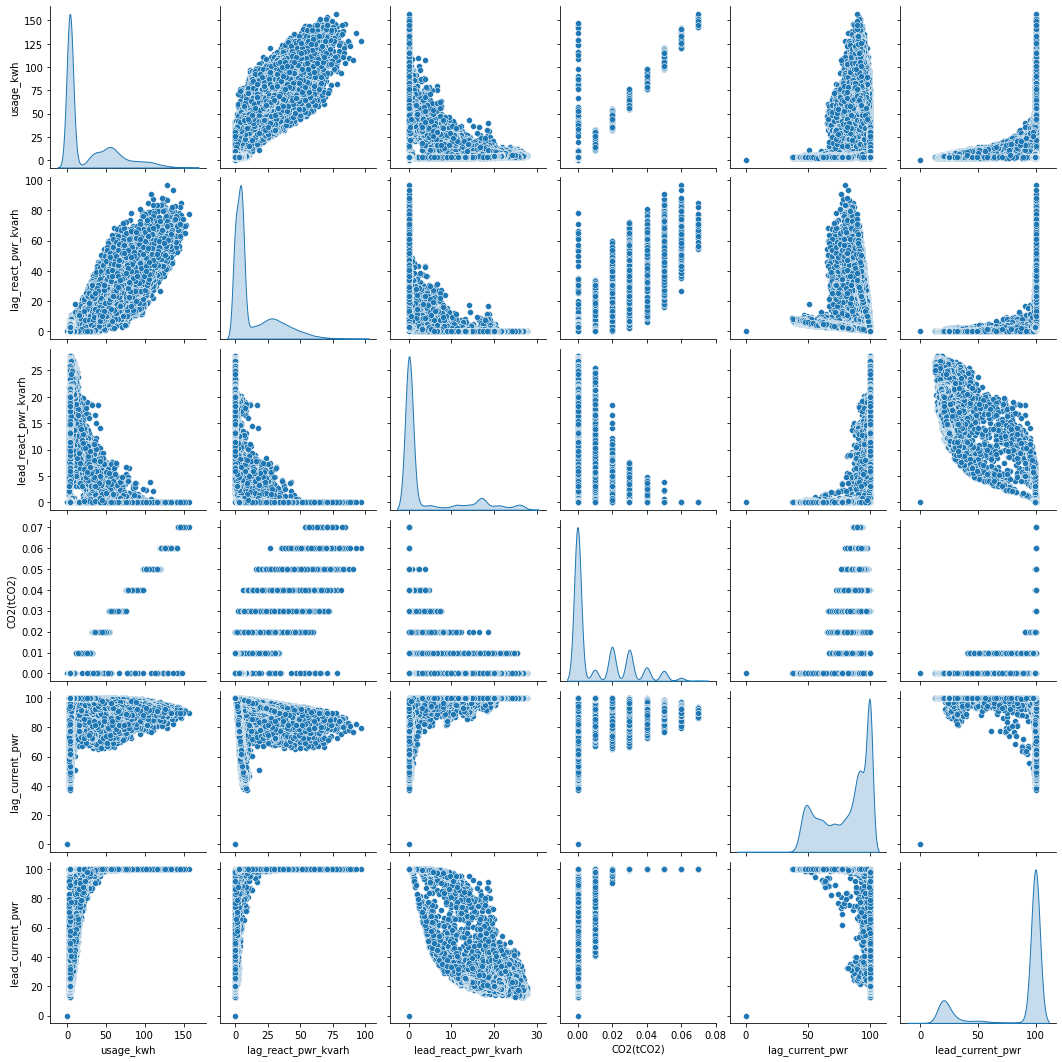

In [ ]:
sns.pairplot(data=df.iloc[:,1:-4], diag_kind='kde')

### Splitting Data into Train/Test

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']]
y = df[['usage_kwh']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:
cat_attribs = ['week_status','day_of_week','load_type']
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('cat', OneHotEncoder(),cat_attribs),
                                ('num', MinMaxScaler(), num_attribs)
])

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression())
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.9768619453437246

In [ ]:
pipeline.score(X_test, y_test)

0.9768619453437246

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

array([3.44915748e+14])

In [ ]:
pipeline.named_steps['mlr_model'].coef_

array([[-5.08872671e+13, -3.90983168e+13, -6.89619855e+13,
        -6.89619855e+13, -8.07509358e+13, -8.07509358e+13,
        -6.89619855e+13, -6.89619855e+13, -6.89619855e+13,
        -2.25066496e+14, -2.25066496e+14, -2.25066496e+14,
         2.90083845e+01,  1.91419272e+00,  1.17473851e+02,
         6.99739086e+00,  4.74945300e+00, -3.54024887e-01]])

### Conclusion
Write a general conclusion about the results of your model.
**This model is very good for predicting kwh usage(97.6 percent)**

## Problem 2

### Reading the Data

In [ ]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == 'Weekday' else 0)

In [127]:
df.week_status.sample(10)

2447     1
12495    1
32387    1
19650    1
26171    0
5091     1
20929    1
21018    1
32658    1
34876    0
Name: week_status, dtype: int64

### Splitting Data into Train/Test

In [132]:
X = df[['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','load_type']]
y = df[['week_status']]

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   usage_kwh             35040 non-null  float64
 1   lag_react_pwr_kvarh   35040 non-null  float64
 2   lead_react_pwr_kvarh  35040 non-null  float64
 3   CO2(tCO2)             35040 non-null  float64
 4   lag_current_pwr       35040 non-null  float64
 5   lead_current_pwr      35040 non-null  float64
 6   nsm                   35040 non-null  int64  
 7   load_type             35040 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.1+ MB


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

### Building the Pipeline

In [136]:
cat_values = ['load_type']
num_values = ['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']

In [141]:
col_transform = ColumnTransformer(transformers=[
                   ('cat', OneHotEncoder(), cat_values),
                   ('num', MinMaxScaler(), num_values)],
                   remainder='passthrough'       
)

In [142]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlg_model', LogisticRegression(max_iter=1000))
])

In [143]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlg_model', LogisticRegression(max_iter=1000))])

### Executing the Model

In [144]:
pipeline.fit(X_train, np.ravel(y_train)) 

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlg_model', LogisticRegression(max_iter=1000))])

### Evaluating Model

In [145]:
y_pred = pipeline.predict(X_test)

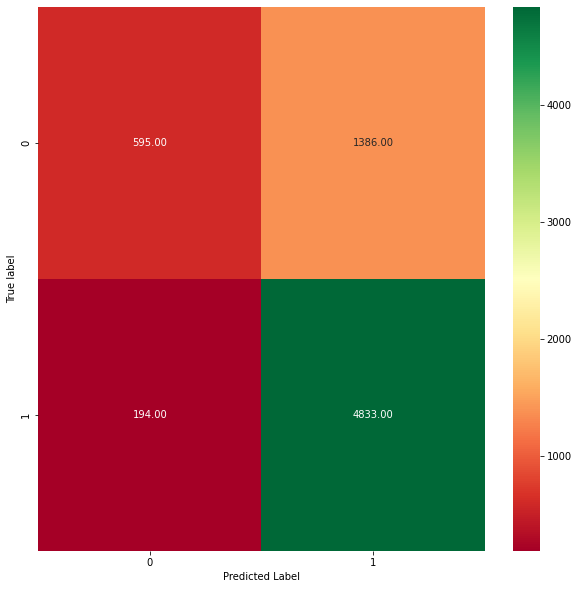

In [146]:
plot_cm(y_test, y_pred)

In [147]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7771345875542692
0.9614083946687886
0.8595056019918195


0.7751473692740675


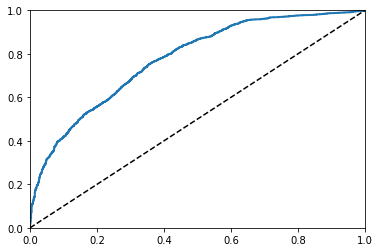

In [150]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

In [151]:
df.week_status.groupby(df.week_status).count()

week_status
0     9984
1    25056
Name: week_status, dtype: int64

In [152]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)

<function matplotlib.pyplot.legend(*args, **kwargs)>

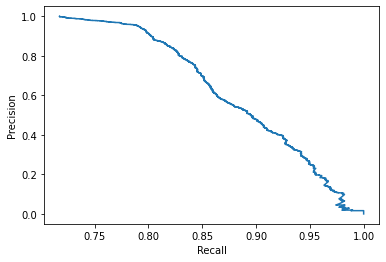

In [153]:
plt.plot(lr_precision, lr_recall, label='logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend

In [154]:
auc(lr_recall, lr_precision)

0.8909202014605343

Area Under the Curve is better(more accurate) with the Precision - Recall Curve

### Conclusion
Write a general conclusion about the results of your model.

**This model is very good at prediciting the week status**